In [1]:
#Heart Failure analysis
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestRegressor
from matplotlib import rcParams


ModuleNotFoundError: No module named 'tensorflow'

In [2]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/e4/14/d795bb156f8cc10eb1dcfe1332b7dbb8405b634688980aa9be8f885cc888/tensorflow-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.16.1 from https://files.pythonhosted.org/packages/e0/36/6278e4e7e69a90c00e0f82944d8f2713dd85a69d1add455d9e50446837ab/tensorflow_intel-2.16.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2db

In [3]:
df = pd.read_csv(r"C:\Praveen Documents\Data Science by Guvi\Heart failure analysis\heart_failure.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
df["high_blood_pressure"].value_counts()

high_blood_pressure
0    194
1    105
Name: count, dtype: int64

In [8]:
df["smoking"].value_counts()

smoking
0    203
1     96
Name: count, dtype: int64

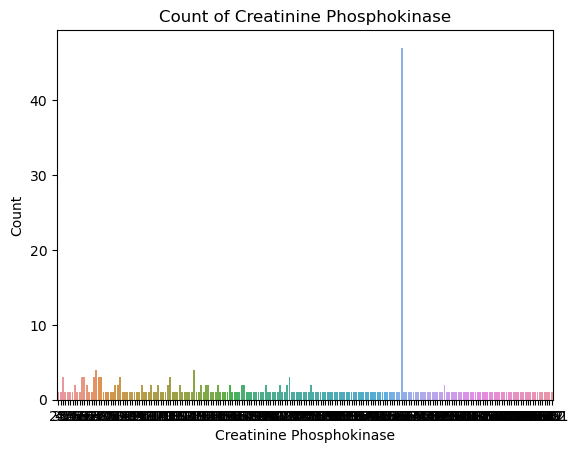

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting data
age = df.iloc[:, 0]
creat = df.iloc[:, 2]
eject = df.iloc[:, 4]
plat = df.iloc[:, 6]
serum = df.iloc[:, 7]
sod = df.iloc[:, 8]
time = df.iloc[:, 11]

# Plotting
sns.countplot(x='creatinine_phosphokinase', data=df)
plt.title('Count of Creatinine Phosphokinase')
plt.xlabel('Creatinine Phosphokinase')
plt.ylabel('Count')
plt.show()


In [17]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [19]:
df.dropna(inplace=True)

In [20]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

Target variable with value 0 : 203
Target variable with value 1 : 96


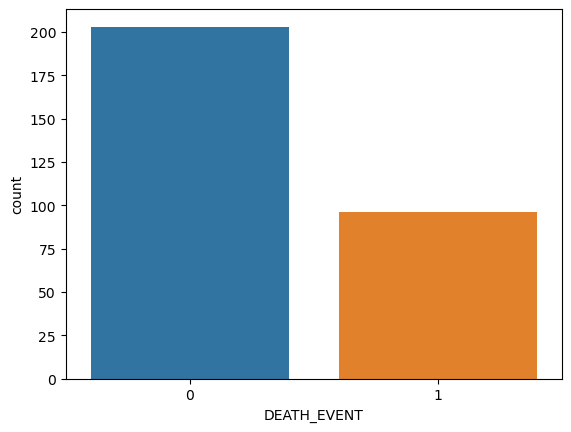

In [25]:
import seaborn as sns
sns.countplot(x = 'DEATH_EVENT',data = df)
print("Target variable with value 0 : "+ format(len(df.loc[df['DEATH_EVENT']==0])))
print("Target variable with value 1 : "+ format(len(df.loc[df['DEATH_EVENT']==1])))

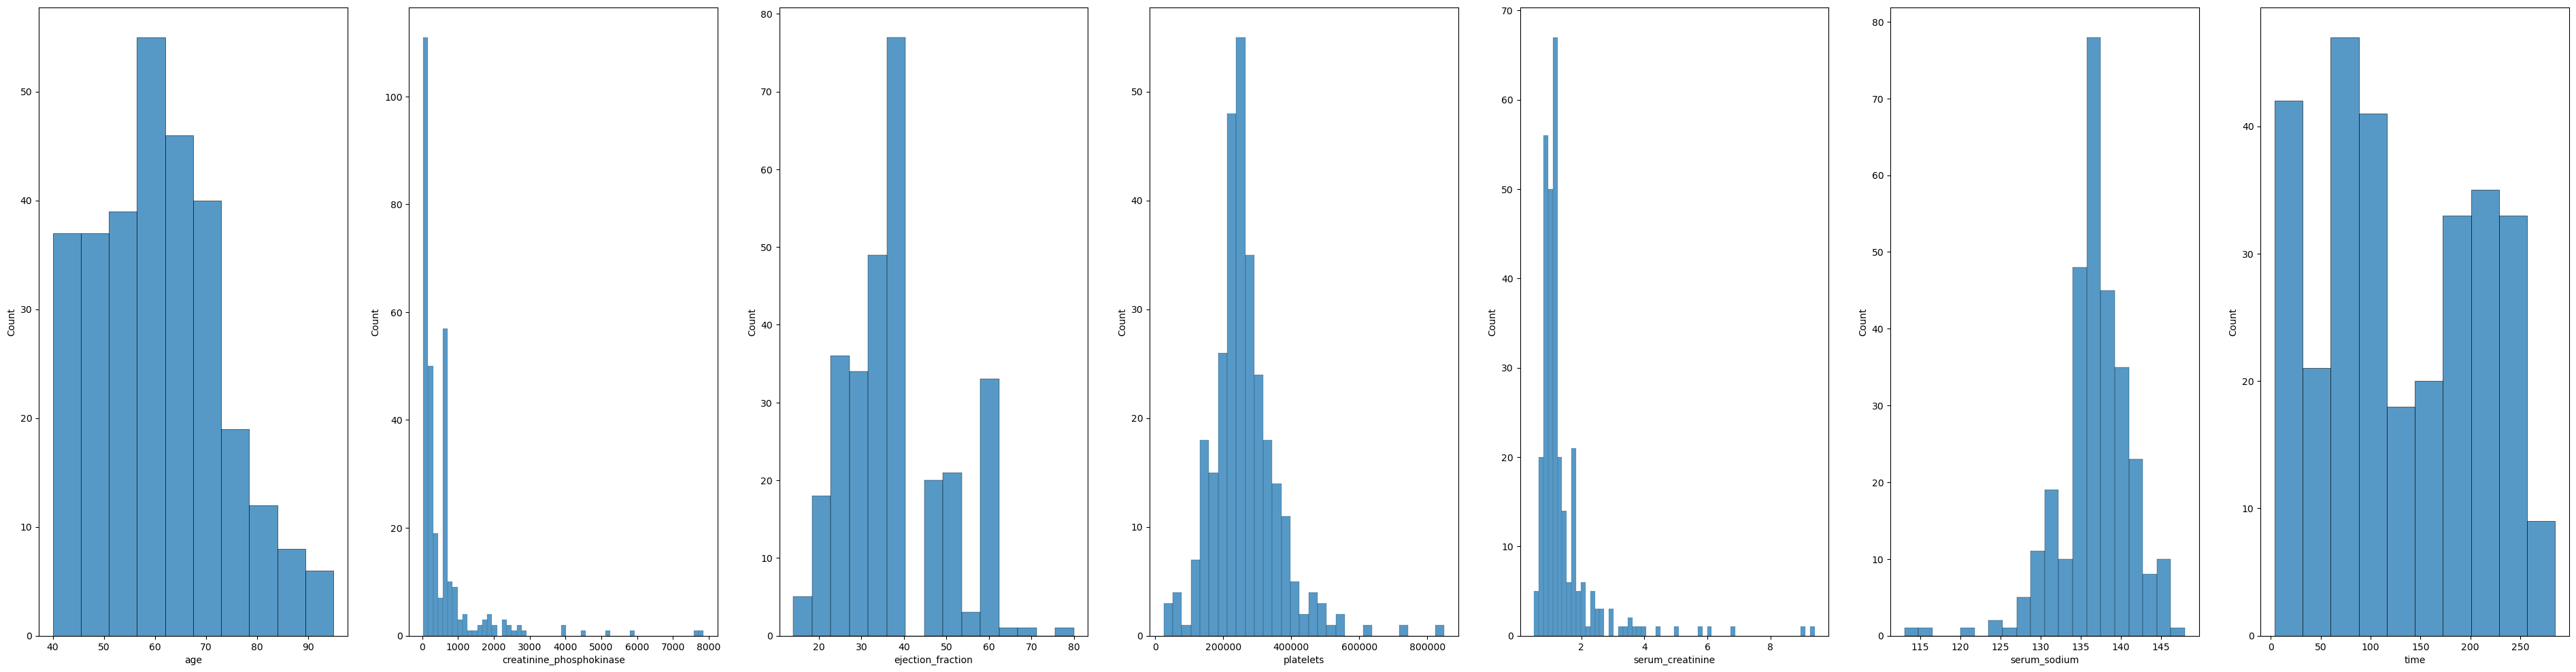

In [26]:

import matplotlib.pyplot as plt
import seaborn as sns
fig, axs = plt.subplots(ncols=7)
sns.histplot(age,ax=axs[0])
sns.histplot(creat,ax=axs[1])
sns.histplot(eject,ax=axs[2])
sns.histplot(plat,ax=axs[3])
sns.histplot(serum,ax=axs[4])
sns.histplot(sod,ax=axs[5])
sns.histplot(time,ax=axs[6])
fig.set_figheight(12)
fig.set_figwidth(48)


<Axes: xlabel='creatinine_phosphokinase', ylabel='Count'>

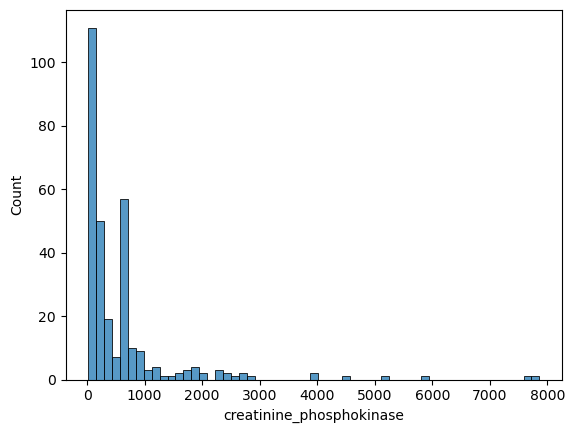

In [32]:
sns.histplot(creat)

In [109]:
pip install autoviz

  Obtaining dependency information for autoviz from https://files.pythonhosted.org/packages/26/e3/eaf11d29a4bc8c0edfd140bc10b0d4ce50abe18d635c0406839f6b0a9173/autoviz-0.1.806-py3-none-any.whl.metadata
  Obtaining dependency information for bokeh~=2.4.2 from https://files.pythonhosted.org/packages/15/06/706a9c43436cd0c3e2f4b94e93ae837e74965e59565c596b727974a74169/bokeh-2.4.3-py3-none-any.whl.metadata
  Obtaining dependency information for emoji from https://files.pythonhosted.org/packages/55/c1/1d97d960831e23a3dd8608b0b489eb4866144445475277a443efb0379609/emoji-2.11.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for holoviews~=1.14.9 from https://files.pythonhosted.org/packages/90/1c/926d507977585708f6441b88c3db8b11a27c074cc85b09f1e8e45e0680ca/holoviews-1.14.9-py2.py3-none-any.whl.metadata
  Obtaining dependency information for hvplot~=0.7.3 from https://files.pythonhosted.org/packages/42/cd/c1eac87f43d8b573f3f675ae396abb58220c8f3211ed43ee03ee89238617/hvplot-0.7.3-py2

Imported v0.1.806. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (299, 13)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  4
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  5
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of 

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
age,float64,0.000000,NA,40.000000,95.000000,No issue
anaemia,int64,0.000000,0,0.000000,1.000000,No issue
creatinine_phosphokinase,int64,0.000000,69,23.000000,7861.000000,Column has 29 outliers greater than upper bound (1280.25) or lower than lower bound(-581.75). Cap them or remove them.
diabetes,int64,0.000000,0,0.000000,1.000000,No issue
ejection_fraction,int64,0.000000,5,14.000000,80.000000,Column has 2 outliers greater than upper bound (67.50) or lower than lower bound(7.50). Cap them or remove them.
high_blood_pressure,int64,0.000000,0,0.000000,1.000000,No issue
platelets,float64,0.000000,NA,25100.000000,850000.000000,Column has 21 outliers greater than upper bound (440000.00) or lower than lower bound(76000.00). Cap them or remove them.
serum_creatinine,float64,0.000000,NA,0.500000,9.400000,Column has 29 outliers greater than upper bound (2.15) or lower than lower bound(0.15). Cap them or remove them.
serum_sodium,int64,0.000000,9,113.000000,148.000000,Column has 4 outliers greater than upper bound (149.00) or lower than lower bound(125.00). Cap them or remove them.
sex,int64,0.000000,0,0.000000,1.000000,No issue


2024-03-27 04:03:30,643 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-03-27 04:03:30,650 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-03-27 04:03:30,705 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-03-27 04:03:30,709 - INFO     - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-03-27 04:03:30,752 - INFO     - Using categorical units to plot a list of strings that 

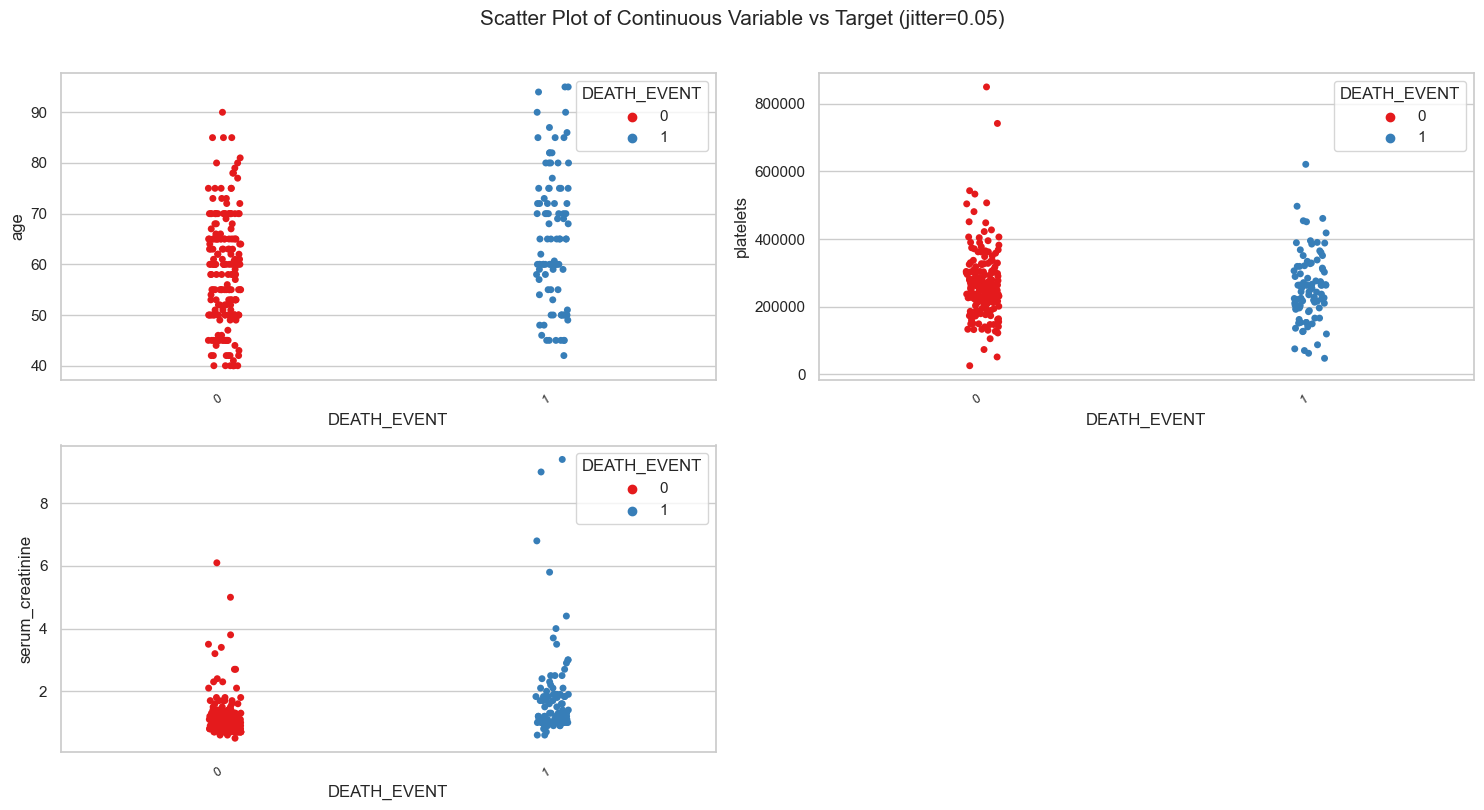

Total Number of Scatter Plots = 6


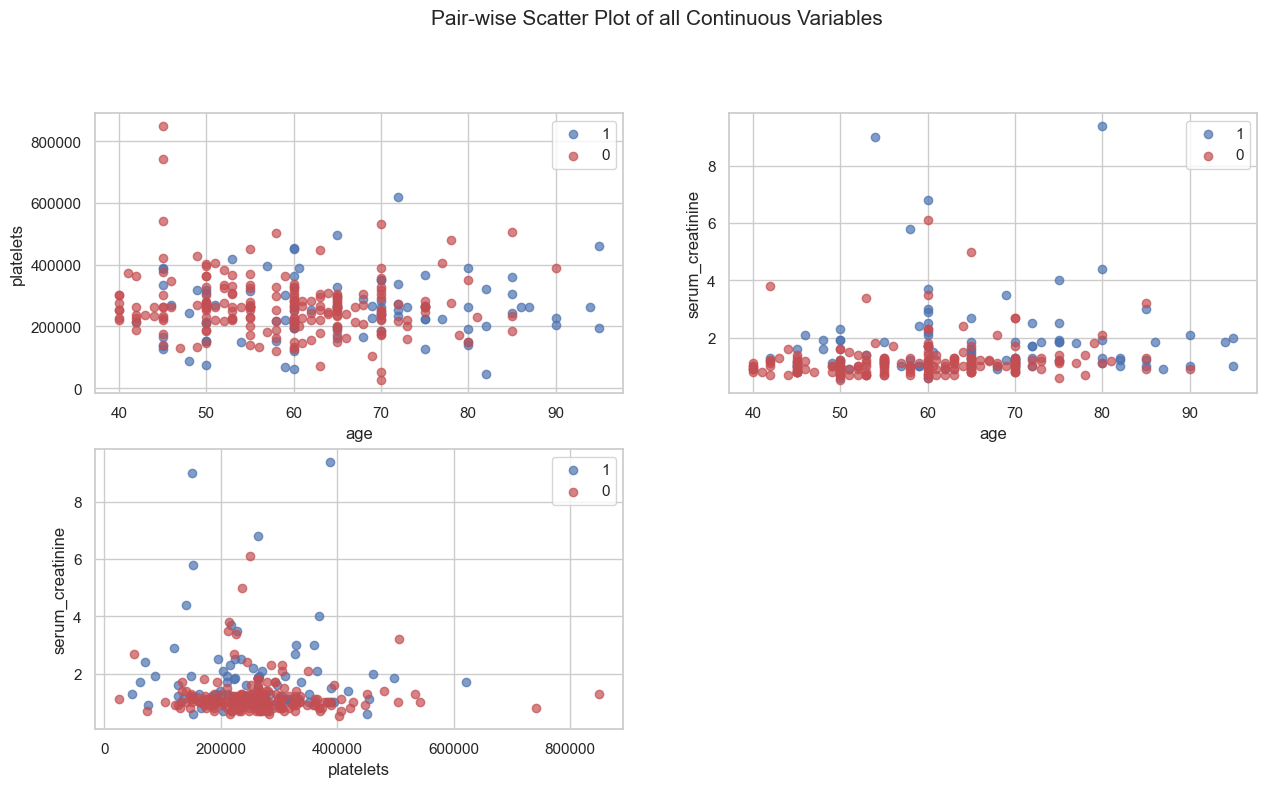

Could not draw some Distribution Plots


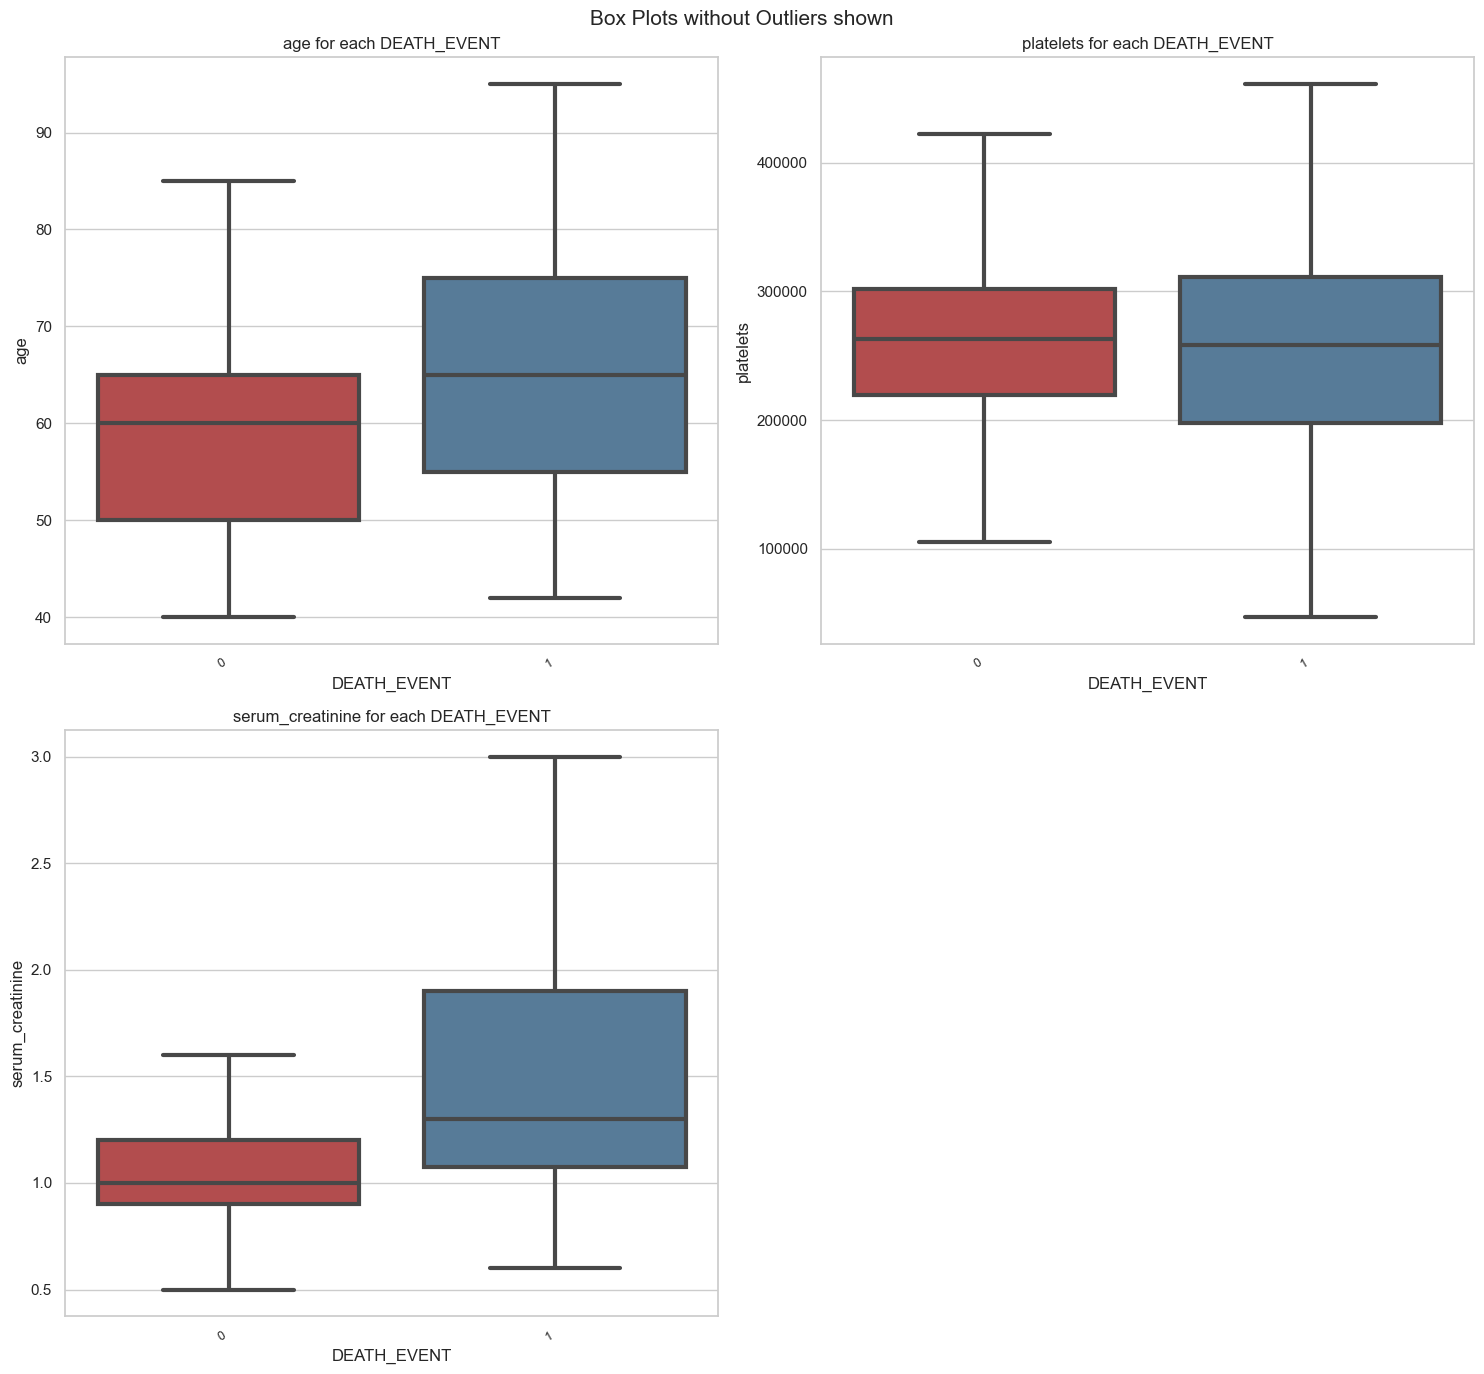

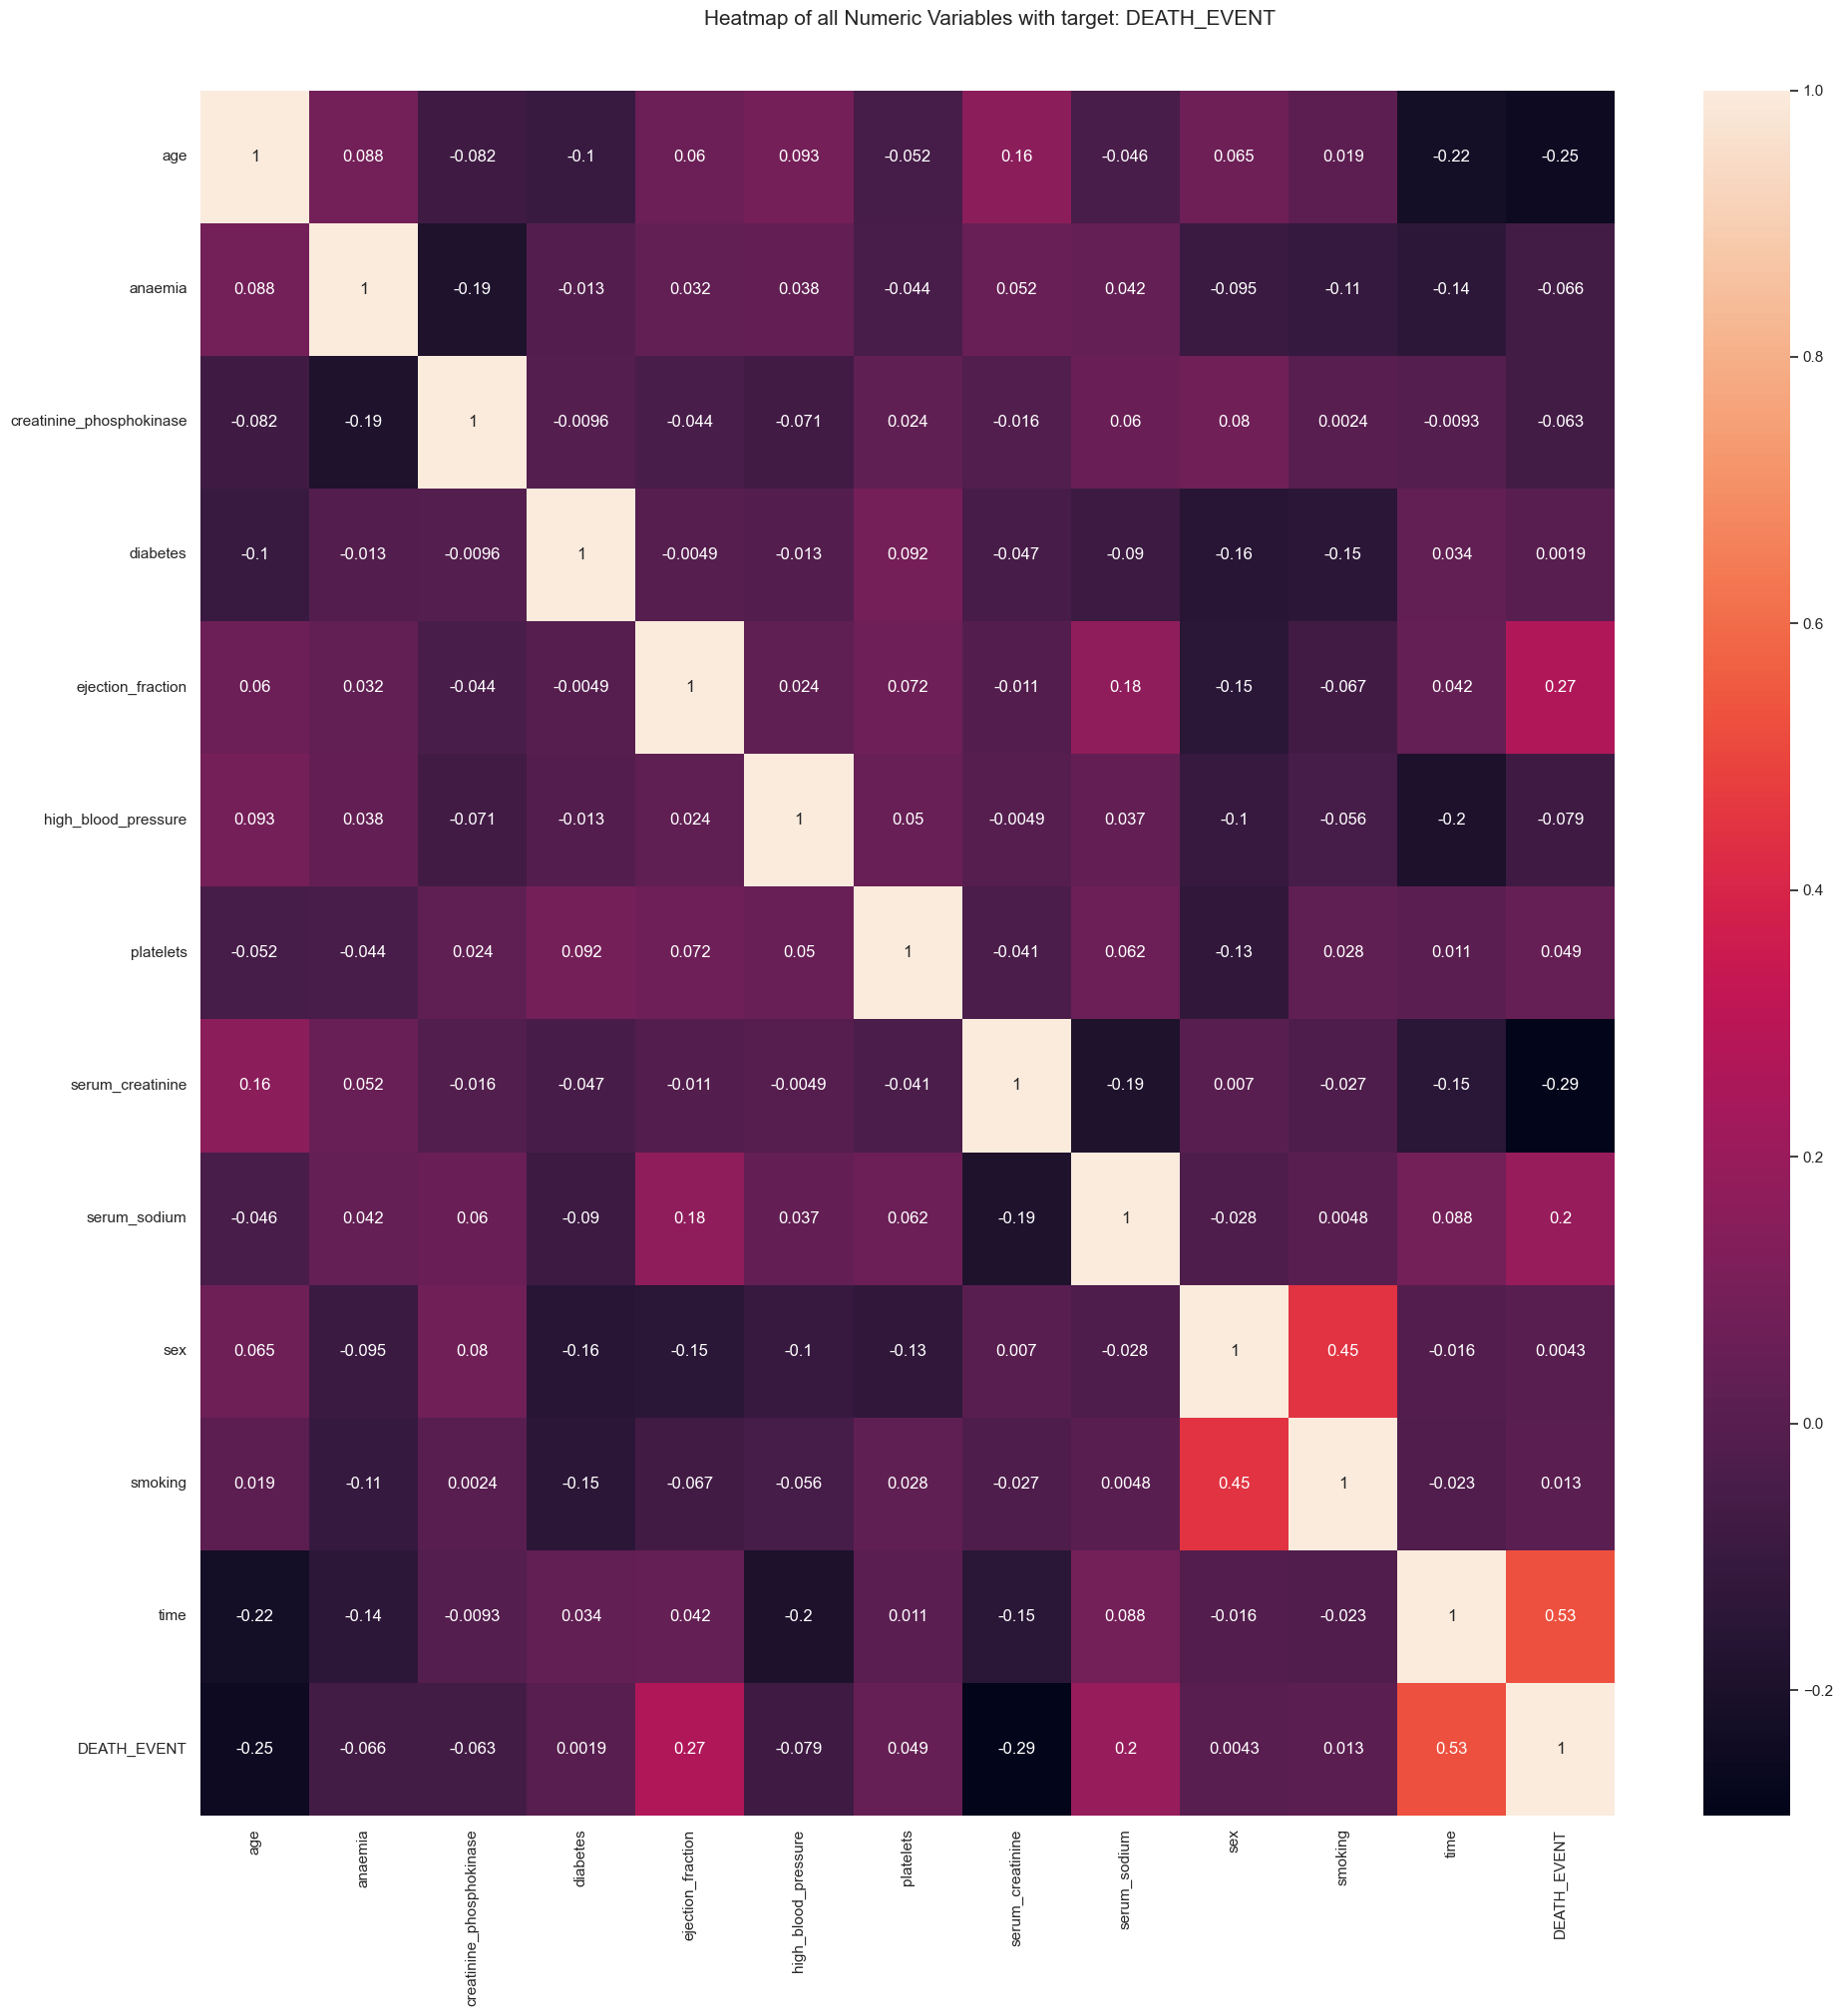

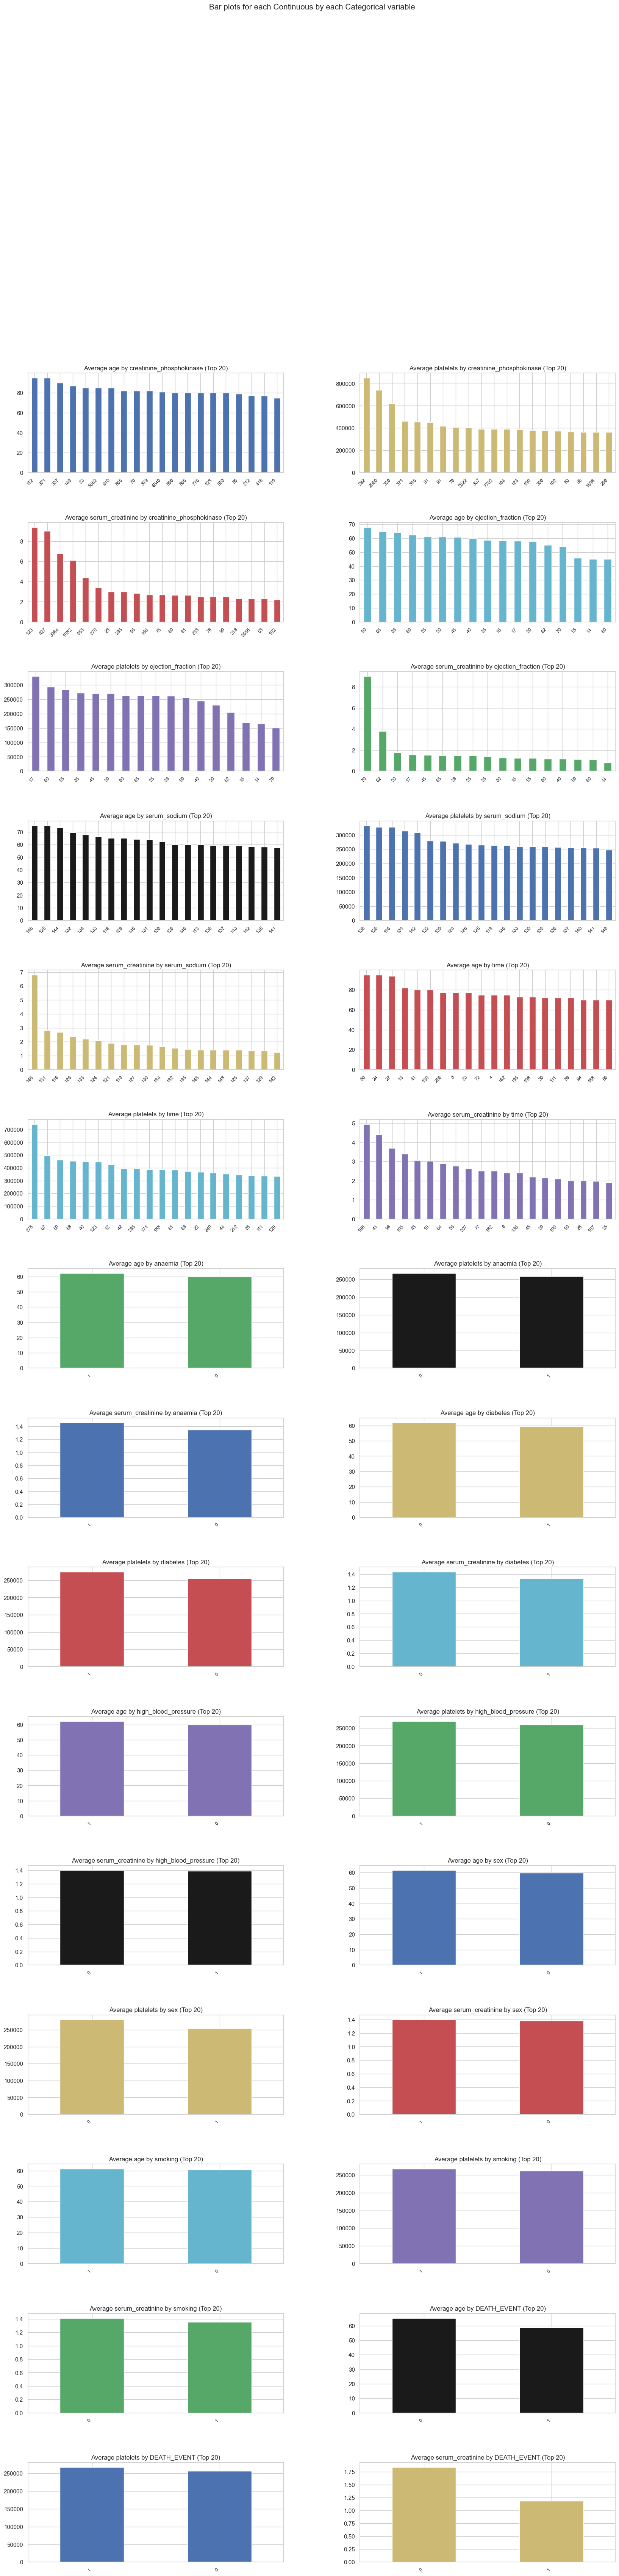

All Plots done
Time to run AutoViz = 9 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [110]:
#EDA

from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
%matplotlib inline
#you have to specify the target variable
dft = AV.AutoViz('C:\Praveen Documents\Data Science by Guvi\Heart failure analysis\heart_failure.csv', depVar = 'DEATH_EVENT')

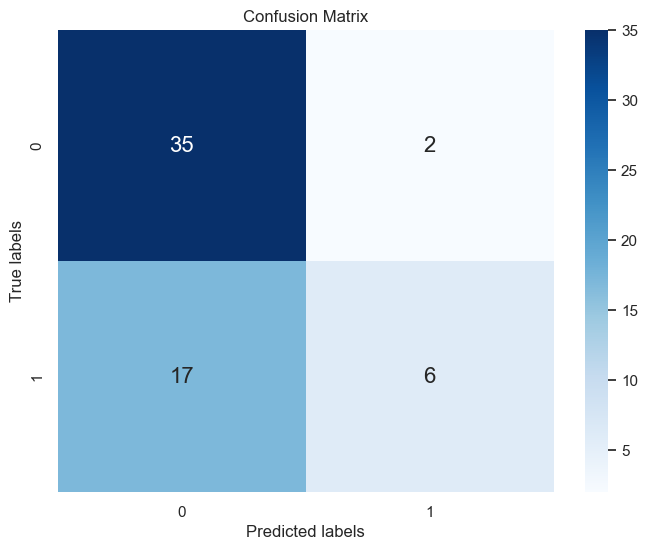

Accuracy: 0.68
Precision: 0.75
Recall: 0.26
Specificity: 0.95
Sensitivity: 0.26


In [114]:
#Confusion matrix:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Define and train your most accurate model
most_accurate_model = dfrst  # Replace RandomForestClassifier() with your actual model

# Train the model (assuming you have already split your data into X_train, X_test, y_train, y_test)
most_accurate_model.fit(X_train, y_train)

# Generate predictions using the most accurate model
y_pred = most_accurate_model.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate additional performance metrics
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)
sensitivity = recall

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Specificity: {specificity:.2f}")
print(f"Sensitivity: {sensitivity:.2f}")

In [40]:
#Train - Test Split
from sklearn.model_selection import train_test_split
x = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2, random_state=42
)


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [45]:
"""Classification Algorithms
Random Forest Classifier
Logistic Regression
KNN
Decision Tree
SVM
Naive Bayes
"""
#Random Forest Classifier
dfrst = RandomForestClassifier(n_estimators=3, max_depth=4, min_samples_split=6, class_weight={0: 8, 1: 1})
ranfor = dfrst.fit(x_train, y_train)
y_pred = ranfor.predict(x_test)


In [47]:
print('accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('f1_score: {:.2f}'.format(f1_score(y_test, y_pred)))


accuracy: 0.72
precision: 1.00
recall: 0.32
f1_score: 0.48


In [48]:
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

In [49]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [50]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
y_pred2 = logisticRegr.predict(x_test)

In [51]:
print('accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred2)))
print('precision: {:.2f}'.format(precision_score(y_test, y_pred2)))
print('recall: {:.2f}'.format(recall_score(y_test, y_pred2)))
print('f1_score: {:.2f}'.format(f1_score(y_test, y_pred2)))

accuracy: 0.80
precision: 0.88
recall: 0.60
f1_score: 0.71


C:\Users\rachu\anaconda3\Lib\site-packages\IPython\core\inputtransformer2.py:627: UserWarning: `make_tokens_by_line` received a list of lines which do not have lineending markers ('\n', '\r', '\r\n', '\x0b', '\x0c'), behavior will be unspecified
  tokens_by_line = make_tokens_by_line(lines)


In [52]:
lr_accuracy = accuracy_score(y_test, y_pred2)
lr_precision = precision_score(y_test, y_pred2)
lr_recall = recall_score(y_test, y_pred2)
lr_f1 = f1_score(y_test, y_pred2)

In [53]:
#KNN 

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [56]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1, Ks):
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(x_train, y_train)
    yhat = neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat == y_test) / np.sqrt(yhat.shape[0])
mean_acc

array([0.53333333, 0.56666667, 0.53333333, 0.55      , 0.53333333,
       0.53333333, 0.53333333, 0.55      , 0.55      ])

In [57]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.5666666666666667 with k= 2


C:\Users\rachu\anaconda3\Lib\site-packages\IPython\core\inputtransformer2.py:627: UserWarning: `make_tokens_by_line` received a list of lines which do not have lineending markers ('\n', '\r', '\r\n', '\x0b', '\x0c'), behavior will be unspecified
  tokens_by_line = make_tokens_by_line(lines)


In [58]:
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(x_train, y_train)
y_pred3 = classifier.predict(x_test)

In [59]:
knn_accuracy = accuracy_score(y_test, y_pred3)
knn_precision = precision_score(y_test, y_pred3)
knn_recall = recall_score(y_test, y_pred3)
knn_f1 = f1_score(y_test, y_pred3)

In [60]:
print('accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred3)))
print('precision: {:.2f}'.format(precision_score(y_test, y_pred3)))
print('recall: {:.2f}'.format(recall_score(y_test, y_pred3)))
print('f1_score: {:.2f}'.format(f1_score(y_test, y_pred3)))

accuracy: 0.57
precision: 0.40
recall: 0.08
f1_score: 0.13


C:\Users\rachu\anaconda3\Lib\site-packages\IPython\core\inputtransformer2.py:627: UserWarning: `make_tokens_by_line` received a list of lines which do not have lineending markers ('\n', '\r', '\r\n', '\x0b', '\x0c'), behavior will be unspecified
  tokens_by_line = make_tokens_by_line(lines)


In [61]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [64]:
mean_acc = np.zeros((9))
for d in range(1, 10):
    drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=d).fit(x_train, y_train)
    drugTree_yhat = drugTree.predict(x_test)
    print("For depth = {} accuracy score is {} ".format(d, accuracy_score(y_test, drugTree_yhat)))
    mean_acc[d-1] = accuracy_score(y_test, drugTree_yhat)

For depth = 1 accuracy score is 0.75 
For depth = 2 accuracy score is 0.75 
For depth = 3 accuracy score is 0.7333333333333333 
For depth = 4 accuracy score is 0.7666666666666667 
For depth = 5 accuracy score is 0.7166666666666667 
For depth = 6 accuracy score is 0.7333333333333333 
For depth = 7 accuracy score is 0.6833333333333333 
For depth = 8 accuracy score is 0.6666666666666666 
For depth = 9 accuracy score is 0.6833333333333333 


In [65]:
print( "The best accuracy was with", mean_acc.max(), "with depth=", mean_acc.argmax()+1)

The best accuracy was with 0.7666666666666667 with depth= 4


In [66]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 1).fit(x_train,y_train)

In [67]:
drugTree_yhat = drugTree.predict(x_test)

In [68]:
print('accuracy: {:.2f}'.format(accuracy_score(y_test, drugTree_yhat)))
print('precision: {:.2f}'.format(precision_score(y_test, drugTree_yhat)))
print('recall: {:.2f}'.format(recall_score(y_test, drugTree_yhat)))
print('f1_score: {:.2f}'.format(f1_score(y_test, drugTree_yhat)))

accuracy: 0.75
precision: 0.81
recall: 0.52
f1_score: 0.63


C:\Users\rachu\anaconda3\Lib\site-packages\IPython\core\inputtransformer2.py:627: UserWarning: `make_tokens_by_line` received a list of lines which do not have lineending markers ('\n', '\r', '\r\n', '\x0b', '\x0c'), behavior will be unspecified
  tokens_by_line = make_tokens_by_line(lines)


In [69]:
dt_accuracy = accuracy_score(y_test, drugTree_yhat)
dt_precision = precision_score(y_test, drugTree_yhat)
dt_recall = recall_score(y_test, drugTree_yhat)
dt_f1 = f1_score(y_test, drugTree_yhat)

In [72]:
#SVM
from sklearn import svm
from sklearn.metrics import f1_score

In [74]:
from sklearn import svm
from sklearn.metrics import f1_score

for k in ('linear', 'poly', 'rbf', 'sigmoid'):
    svm_model = svm.SVC(kernel=k).fit(x_train, y_train)
    svm_yhat = svm_model.predict(x_test)
    print("For kernel: {}, the f1 score is: {}".format(k, f1_score(y_test, svm_yhat, average='binary')))

For kernel: linear, the f1 score is: 0.6341463414634146
For kernel: poly, the f1 score is: 0.0
For kernel: rbf, the f1 score is: 0.0
For kernel: sigmoid, the f1 score is: 0.0


In [75]:
clf = svm.SVC(kernel='linear')

In [79]:
clf.fit(x_train, y_train)

SVC(kernel='linear')

In [81]:
yhat = clf.predict(x_test)

In [82]:
print('accuracy: {:.2f}'.format(accuracy_score(y_test, yhat)))
print('precision: {:.2f}'.format(precision_score(y_test, yhat)))
print('recall: {:.2f}'.format(recall_score(y_test, yhat)))
print('f1_score: {:.2f}'.format(f1_score(y_test, yhat)))

accuracy: 0.75
precision: 0.81
recall: 0.52
f1_score: 0.63


C:\Users\rachu\anaconda3\Lib\site-packages\IPython\core\inputtransformer2.py:627: UserWarning: `make_tokens_by_line` received a list of lines which do not have lineending markers ('\n', '\r', '\r\n', '\x0b', '\x0c'), behavior will be unspecified
  tokens_by_line = make_tokens_by_line(lines)


In [83]:
svm_accuracy = accuracy_score(y_test, yhat)
svm_precision = precision_score(y_test, yhat)
svm_recall = recall_score(y_test, yhat)
svm_f1 = f1_score(y_test, yhat)

In [84]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [85]:
gnb = GaussianNB()

In [86]:
gnb.fit(x_train, y_train)

GaussianNB()

In [87]:
y_pred4 = gnb.predict(x_test)

In [88]:
print('accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred4)))
print('precision: {:.2f}'.format(precision_score(y_test, y_pred4)))
print('recall: {:.2f}'.format(recall_score(y_test, y_pred4)))
print('f1_score: {:.2f}'.format(f1_score(y_test, y_pred4)))

accuracy: 0.73
precision: 0.91
recall: 0.40
f1_score: 0.56


C:\Users\rachu\anaconda3\Lib\site-packages\IPython\core\inputtransformer2.py:627: UserWarning: `make_tokens_by_line` received a list of lines which do not have lineending markers ('\n', '\r', '\r\n', '\x0b', '\x0c'), behavior will be unspecified
  tokens_by_line = make_tokens_by_line(lines)


In [89]:
nb_accuracy = accuracy_score(y_test, y_pred4)
nb_precision = precision_score(y_test, y_pred4)
nb_recall = recall_score(y_test, y_pred4)
nb_f1 = f1_score(y_test, y_pred4)

In [94]:
#Prediction Dictionary
accuracy_list = [rf_accuracy, lr_accuracy, knn_accuracy, dt_accuracy, svm_accuracy, nb_accuracy]
precision_list = [rf_precision, lr_precision, knn_precision, dt_precision, svm_precision, nb_precision]
recall_list = [rf_recall, lr_recall, knn_recall, dt_recall, svm_recall, nb_recall]
f1_list = [rf_f1, lr_f1, knn_f1, dt_f1,svm_f1, nb_f1]
columns = ['Random Forest', 'Logistic Regression', 'KNN', 'Decision Tree', 'Support Vector Machine','Naive Bayes']
index = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
evaluation_df = pd.DataFrame([accuracy_list, precision_list, recall_list, f1_list], index=index, columns=columns)
evaluation_df = evaluation_df.transpose()
evaluation_df.columns.name = 'Algorithms'

In [96]:
#Most Accurate Model
evaluation_df.sort_values(by = "Accuracy", ascending = False)

Algorithms,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.800000,0.882353,0.60,0.714286
Decision Tree,0.750000,0.812500,0.52,0.634146
Support Vector Machine,0.750000,0.812500,0.52,0.634146
Naive Bayes,0.733333,0.909091,0.40,0.555556
Random Forest,0.716667,1.000000,0.32,0.484848
KNN,0.566667,0.400000,0.08,0.133333


In [97]:
#Highest Precision Score Model
evaluation_df.sort_values(by = "Precision", ascending = False)

Algorithms,Accuracy,Precision,Recall,F1 Score
Random Forest,0.716667,1.000000,0.32,0.484848
Naive Bayes,0.733333,0.909091,0.40,0.555556
Logistic Regression,0.800000,0.882353,0.60,0.714286
Decision Tree,0.750000,0.812500,0.52,0.634146
Support Vector Machine,0.750000,0.812500,0.52,0.634146
KNN,0.566667,0.400000,0.08,0.133333


In [98]:
#Highest Recall Score Model
evaluation_df.sort_values(by = "Recall", ascending = False)

Algorithms,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.800000,0.882353,0.60,0.714286
Decision Tree,0.750000,0.812500,0.52,0.634146
Support Vector Machine,0.750000,0.812500,0.52,0.634146
Naive Bayes,0.733333,0.909091,0.40,0.555556
Random Forest,0.716667,1.000000,0.32,0.484848
KNN,0.566667,0.400000,0.08,0.133333


In [99]:
#Highest F1 Score Model
evaluation_df.sort_values(by = "F1 Score", ascending = False)

Algorithms,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.800000,0.882353,0.60,0.714286
Decision Tree,0.750000,0.812500,0.52,0.634146
Support Vector Machine,0.750000,0.812500,0.52,0.634146
Naive Bayes,0.733333,0.909091,0.40,0.555556
Random Forest,0.716667,1.000000,0.32,0.484848
KNN,0.566667,0.400000,0.08,0.133333


<Axes: >

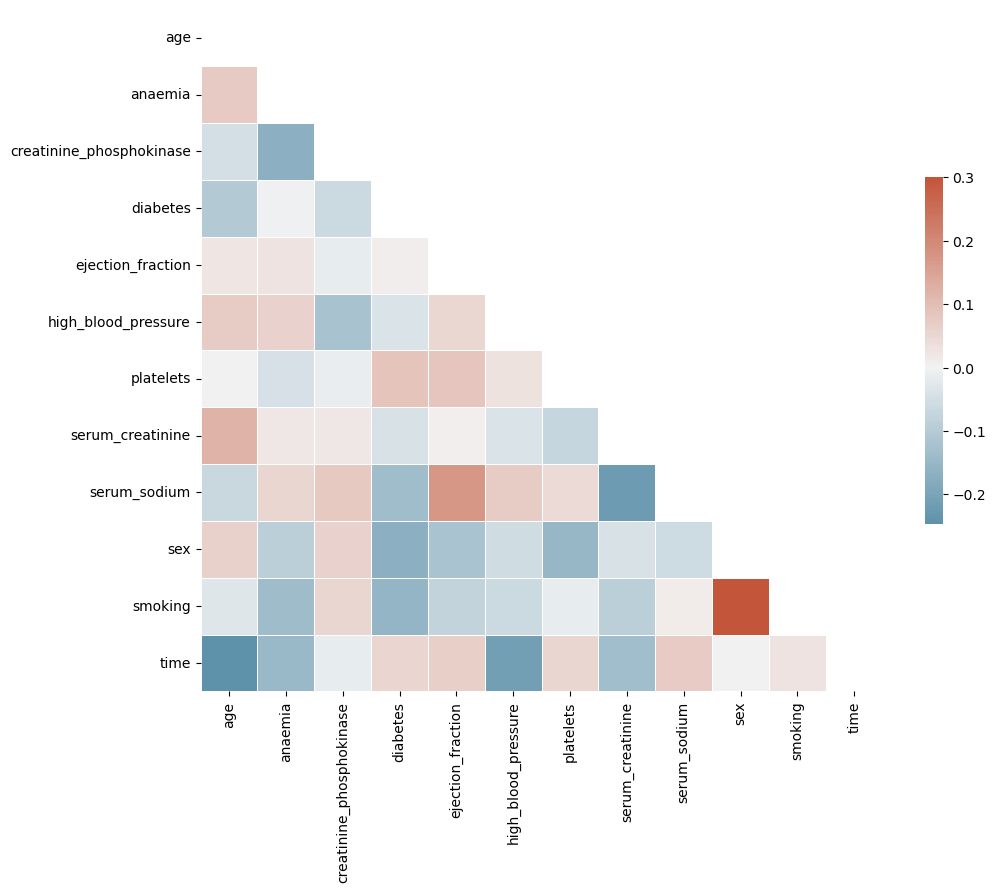

In [100]:
# Generate a mask for the upper triangle
corr = x_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
#Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [101]:
#FEATURE SELECTION
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
# selected features are selected in multicollinearity check part
X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=414)

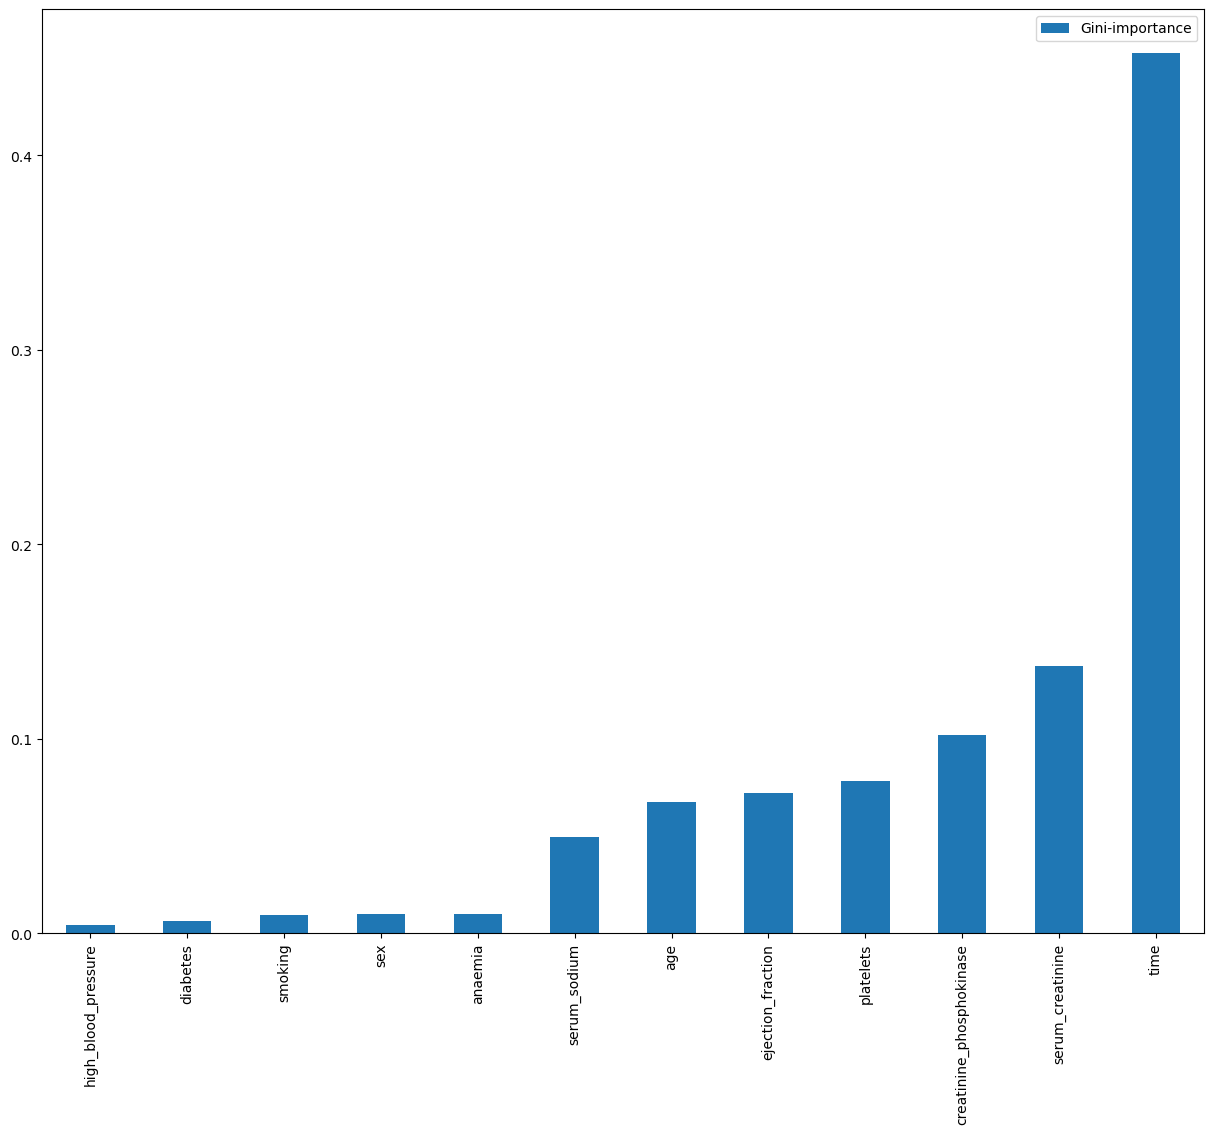

In [103]:
feature_names = [f"feature {i}" for i in range((X.shape[1]))]
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, forest.feature_importances_):
    feats[feature] = importance #add the name/value pair
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini‑importance'})
importances.sort_values(by='Gini‑importance').plot(kind='bar', rot=90, figsize=(15,12))
plt.show()